## step1:
 * understand the problem.
     * classify the given tweets data in positive comment or negative comment or neutral comment

## step2:
* load the need libraries..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE,ADASYN
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## step3:
* load the data..

In [2]:
da=pd.read_csv("twitter.csv")
df=pd.DataFrame(da)
display(df)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


## step 4: data preprocessing..

In [3]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.tail()

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
df.sample(5)

,clean_text,category
76487,seems only few pidis finding the institutions ...,-1.0
115894,they are chanting nirav modi modi get act righ...,1.0
105497,modi and yogi are not from last years yogi cam...,0.0
157165,congratulations honble true patriot honest tru...,1.0
41861,chowkidar modi join congress defeat congress,0.0


In [6]:
print("shape :",df.shape)
print("size :",df.size)

shape : (162980, 2)
size : 325960


In [7]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [8]:
df.dtypes

clean_text     object
category      float64
dtype: object

In [9]:
df["category"].unique()

array([-1.,  0.,  1., nan])

In [10]:
df["category"].value_counts()

 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64

In [11]:
## missing value check and hanling .
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [12]:
df["category"].fillna(value=df["category"].median(),inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

clean_text    0
category      0
dtype: int64

## EDA analysis..

<AxesSubplot:xlabel='category', ylabel='count'>

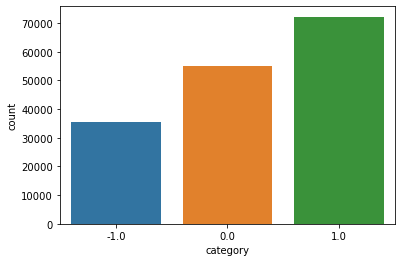

In [15]:
sns.countplot(x=df["category"]) # target is unbalanced dataset..(SMOTE OR ADASYN used to balanced the data.. )

<AxesSubplot:xlabel='category', ylabel='Count'>

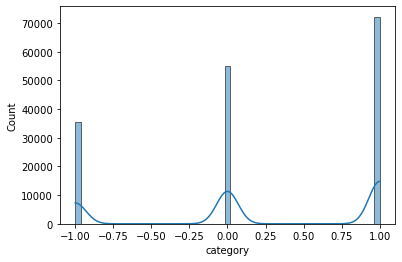

In [16]:
sns.histplot(x=df["category"],kde=True)

<AxesSubplot:ylabel='Density'>

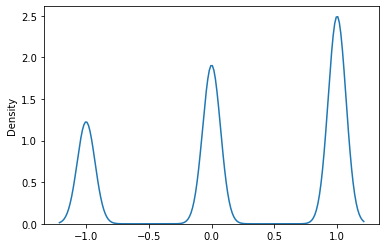

In [17]:
sns.distplot(x=df["category"],hist=False)

## removing the unnecessary punctuation,tags

In [18]:
"i am vignesh" == "i am vignesh." 
# above this sentences all the letter is same only but one difference dot punctutation. (result is false)
#this reason also necessary to remove the punctutation.

False

In [19]:
## Text include punctuation we want to remove that
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punc(x):
    text="".join([char for char in x if char not in string.punctuation])
    return text

In [21]:
df["text"]=df['clean_text'].apply(lambda x:remove_punc(x))

In [22]:
df

,clean_text,category,text
0,when modi promised “minimum government maximum...,-1.0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...,0.0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1.0,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1.0,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1.0,answer who among these the most powerful world...
...,...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0,why these 456 crores paid neerav modi not reco...
162976,dear rss terrorist payal gawar what about modi...,-1.0,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...,0.0,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...,0.0,there big project came into india modi dream p...


In [23]:
df.drop(["clean_text"],axis=1,inplace=True)

In [24]:
import re
df["text"]=df["text"].replace('“','',regex=True)

In [25]:
df # get the clear data...

,category,text
0,-1.0,when modi promised minimum government maximum ...
1,0.0,talk all the nonsense and continue all the dra...
2,1.0,what did just say vote for modi welcome bjp t...
3,1.0,asking his supporters prefix chowkidar their n...
4,1.0,answer who among these the most powerful world...
...,...,...
162975,-1.0,why these 456 crores paid neerav modi not reco...
162976,-1.0,dear rss terrorist payal gawar what about modi...
162977,0.0,did you cover her interaction forum where she ...
162978,0.0,there big project came into india modi dream p...


## train the model..

In [26]:
x=df.iloc[:,1]
x

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: text, Length: 162976, dtype: object

In [27]:
y=df.iloc[:,0]
y

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162976, dtype: float64

In [28]:
# convert the text data into numerical data 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# CountVectorizer- less importance give for all the words
# TfidfVectorizer - more importance give for all the words..

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=2)
count=TfidfVectorizer(stop_words="english")
x_train=count.fit_transform(x_train)
x_test=count.transform(x_test)

In [30]:
x_train

<146678x99859 sparse matrix of type '<class 'numpy.float64'>'
	with 1830541 stored elements in Compressed Sparse Row format>

In [31]:
# convert the sparse matrix into dense matrix..
#x_train.toarray()

In [32]:
#convert the imbalance data into balance data..
smote=SMOTE(random_state=2)
x_sm,y_sm=smote.fit_resample(x_train,y_train)

In [33]:
print("before :",Counter(y_train))
print("after :",Counter(y_sm))

before : Counter({1.0: 65002, 0.0: 49715, -1.0: 31961})
after : Counter({0.0: 65002, 1.0: 65002, -1.0: 65002})


In [34]:
# create the model..
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
model=MultinomialNB()
model=model.fit(x_sm,y_sm)
predict=model.predict(x_test)
accuracy=accuracy_score(y_test,predict)

In [35]:
accuracy

0.703521904528163

In [36]:
print("test accuracy :",model.score(x_test,y_test))

test accuracy : 0.703521904528163


In [37]:
print("train accuracy :",model.score(x_train,y_train))

train accuracy : 0.8075035110923247


In [38]:
bi=BernoulliNB() # binary classification output is supported.
model1=MultinomialNB()
model1=model1.fit(x_sm,y_sm)
model1.score(x_test,y_test)

0.703521904528163

In [39]:
model1.score(x_train,y_train)

0.8075035110923247

## above method accuracy is overfitting ,so we use reqularization and ensemble technique  to reduce the overffing.

In [40]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LogisticRegression

In [41]:
log=LogisticRegression(max_iter=100,C=1,solver="liblinear",penalty="l1")
log.fit(x_sm,y_sm)
test1=log.score(x_test,y_test)
train1=log.score(x_train,y_train)
print("test accuracy :",test1)
print("train accuracy :",train1)

test accuracy : 0.8807829181494662
train accuracy : 0.8892812828099647


In [42]:
message=input('Enter the msg :')
msginput=count.transform([message])
predict=log.predict(msginput)
if(predict[0]==0): #[0]==1 means [msg]list have only one index value only that reason also given in [0]==1 
    print('neutral tweet')
elif(predict[0]==-1):
    print('negative tweet')
elif(predict[0]==1):
    print("positive tweet")

Enter the msg :hello
neutral tweet


## Result:

* logisticregression method get the better accuracy in train and test (88%)


## deployement implementation..

In [43]:
import pickle
pickle.dump(log,open("tweet.pkl","wb"))